<a href="https://colab.research.google.com/github/Nanaminguka/Nanaminguka/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#импорт

In [19]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import utils


In [ ]:
#разделение на тестовую и обучающую выборку

In [4]:
(x_train,y_train), (x_test, y_test), = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Shirt','Sandal','Sneaker','Bag','Ankle boot']

In [ ]:
#обработка данных

In [ ]:
#суреттер

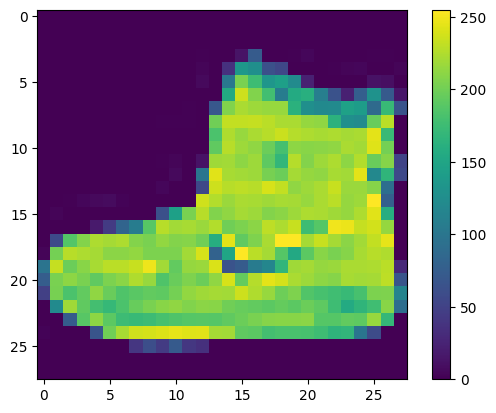

In [9]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
#нормализация

In [10]:
x_train = x_train / 255
x_test = x_test / 255

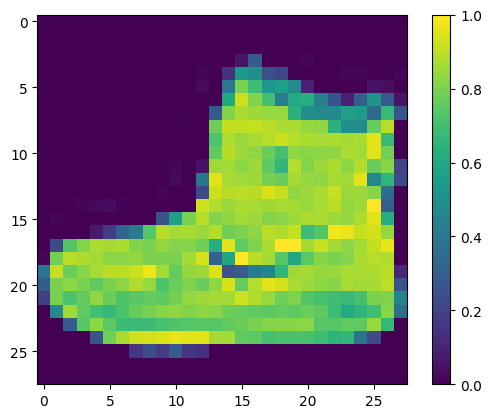

In [11]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
#несколько изображение вместе

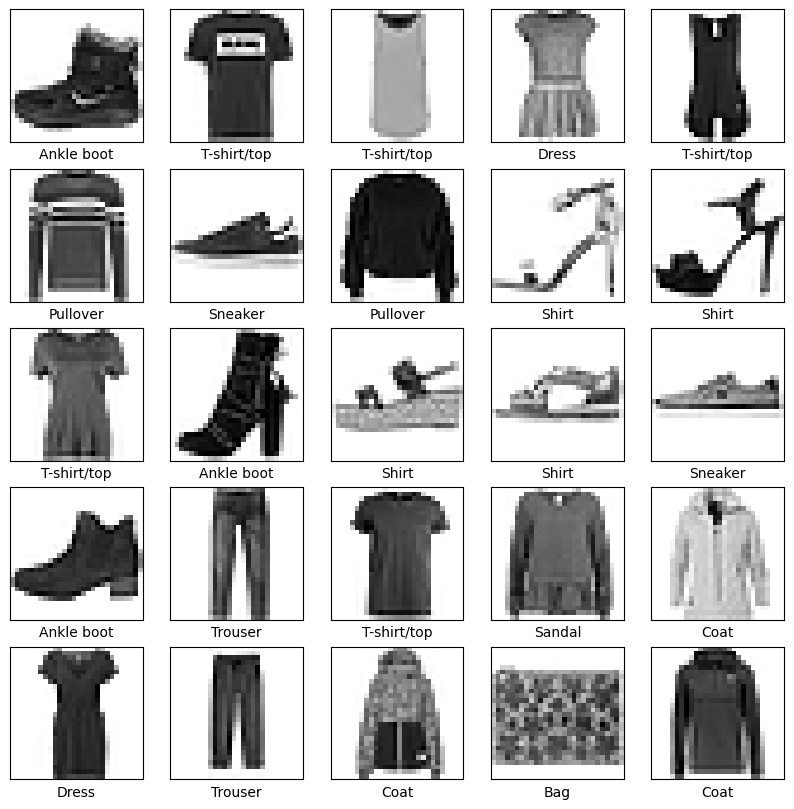

In [13]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])


In [ ]:
#создадим модель

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#компиляция

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#обучение

In [22]:
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7300 - accuracy: 0.7631
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5153 - accuracy: 0.8267
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4713 - accuracy: 0.8396
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4468 - accuracy: 0.8470
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4289 - accuracy: 0.8526
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4157 - accuracy: 0.8556
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4043 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3948 - accuracy: 0.8636
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3867 - accuracy: 0.8655
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.378

In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8524
Test accuracy: 0.852400004863739


In [24]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [76]:
predictions[54]

array([2.3162942e-02, 1.2682844e-02, 6.7719835e-01, 1.6264101e-02,
       2.0165992e-01, 2.8359579e-04, 5.6968037e-02, 2.5724317e-05,
       1.1746448e-02, 8.0178170e-06], dtype=float32)

In [77]:
np.argmax(predictions[54])

2

In [78]:
y_train[54]

2

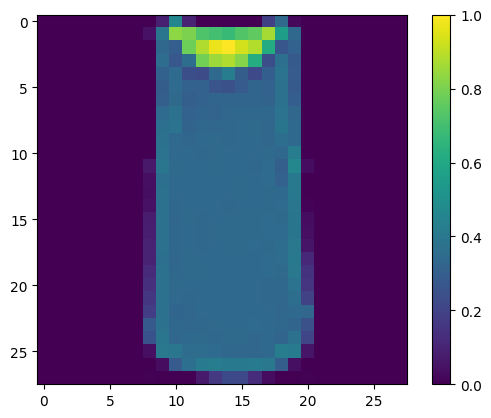

In [79]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)

In [80]:
class_names[np.argmax(predictions[2])]

'T-shirt/top'